Check that we understand why the astrometric precision blew up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
from lsst.sims.maf.metrics import BaseMetric
import lsst.sims.maf.utils as utils

In [2]:
db_minion = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/minion_1016_sqlite.db')
db_enigma = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/enigma_1189_sqlite.db')

sql = 'fieldRA < %f and fieldDec < %f and fieldDec > %f and filter = "r"' % (np.radians(3.5), np.radians(0.1), np.radians(-3.5) )

In [3]:
cols = ['expMJD', 'fiveSigmaDepth', 'FWHMgeom', 'filter']
minion_data = utils.getSimData(db_minion, sql, cols)
cols = ['expMJD', 'fiveSigmaDepth', 'finSeeing', 'filter']
enigma_data = utils.getSimData(db_enigma, sql, cols)

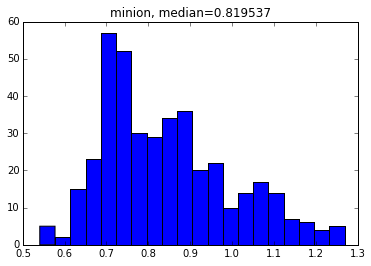

In [4]:
plt.hist(minion_data['FWHMgeom'], bins=20)
plt.title('minion, median=%f' % np.median(minion_data['FWHMgeom']))

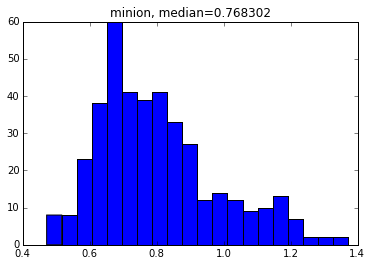

In [5]:
plt.hist(enigma_data['finSeeing'], bins=20)
plt.title('minion, median=%f' % np.median(enigma_data['finSeeing']))

In [6]:
star_mag = 24.
enigma_prec = utils.astrom_precision(enigma_data['finSeeing'], utils.m52snr(star_mag, enigma_data['fiveSigmaDepth']))
minion_prec = utils.astrom_precision(minion_data['FWHMgeom'], utils.m52snr(star_mag,minion_data['fiveSigmaDepth']))

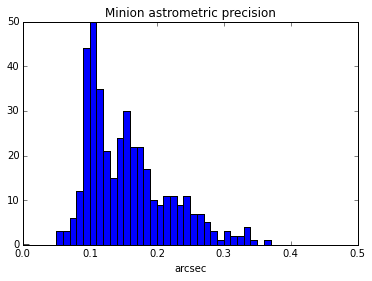

In [7]:
bins = np.arange(0,.5,.01)
plt.hist(minion_prec, bins=bins)
plt.title('Minion astrometric precision')
plt.xlabel('arcsec')

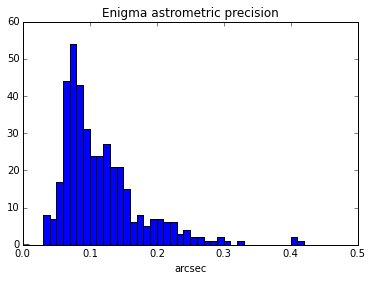

In [8]:
plt.hist(enigma_prec, bins=bins)
plt.title('Enigma astrometric precision')
plt.xlabel('arcsec')

Note that the number of stars in the best bins has dropped by a factor of 2!

In [9]:
enigma_metric = metrics.ProperMotionMetric(seeingCol='finSeeing', rmag=24.)
minion_metric = metrics.ProperMotionMetric(seeingCol='FWHMgeom', rmag=24.)

In [10]:
print 'enigma proper motion precision = % f' % enigma_metric.run(enigma_data)
print 'minion proper motion precision = % f' % minion_metric.run(minion_data)

enigma proper motion precision =  1.470404
minion proper motion precision =  2.223756


Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database with no constraint.
Found 2447931 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
monopole: 137481  dipole: lon: -92.7036, lat: 79.0814, amp: 264130
Plotting complete.


Optimal bin calculation tried to make 97493528 bins, returning 200


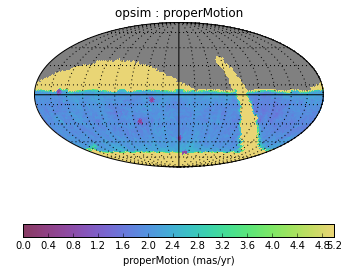

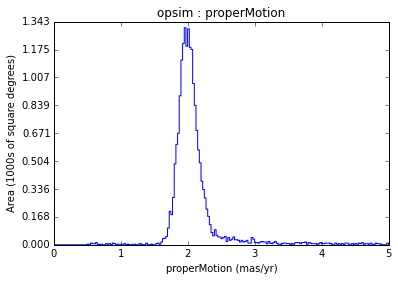

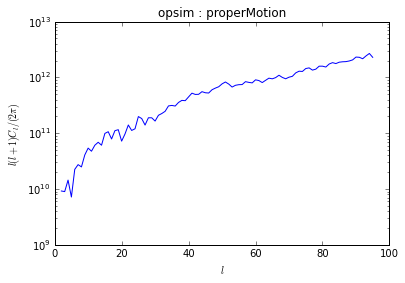

In [15]:
nside = 32
plotDict = {'colorMin': 0, 'colorMax': 5, 'xMin':0., 'xMax': 5.}
slicer = slicers.HealpixSlicer(nside=nside, lonCol='ditheredRA', latCol='ditheredDec')
minion_bundle = metricBundles.MetricBundle(minion_metric, slicer, '', plotDict=plotDict)
bg = metricBundles.MetricBundleGroup({0:minion_bundle}, db_minion)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database with no constraint.
Found 2469307 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
monopole: 24506.5  dipole: lon: -65.9545, lat: 67.5259, amp: 48721.6
Plotting complete.


Optimal bin calculation tried to make 23819581 bins, returning 200


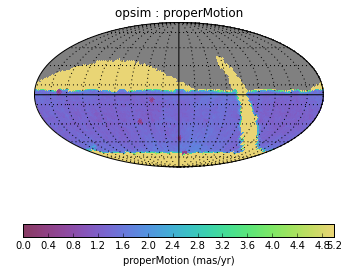

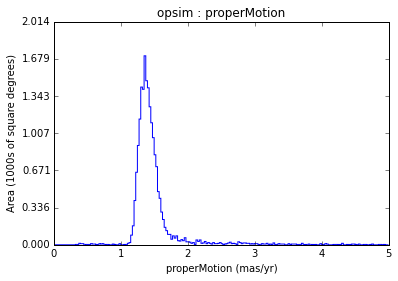

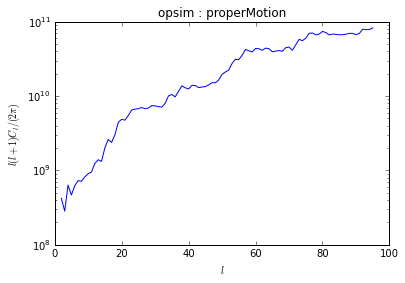

In [16]:
slicer = slicers.HealpixSlicer(nside=nside, lonCol='ditheredRA', latCol='ditheredDec')
enigma_bundle = metricBundles.MetricBundle(enigma_metric, slicer, '', plotDict=plotDict)
bg = metricBundles.MetricBundleGroup({0:enigma_bundle}, db_enigma)
bg.runAll()
bg.plotAll(closefigs=False)

In [17]:
print 'median enigma proper motion precision = %f mas/yr' % np.median(enigma_bundle.metricValues)
print 'median minion proper motion precision = %f mas/yr' % np.median(minion_bundle.metricValues)


median enigma proper motion precision = 1.347744 mas/yr
median minion proper motion precision = 1.952654 mas/yr
